# PLANE PRICE PREDICTION

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [44]:
df = pd.read_csv('DATA/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [46]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [47]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

#### We can drop 'flight' since it is just the flight code. ####

In [48]:
df.drop('flight', axis=1, inplace=True)

#### Converting categorical features to numeric features with dummy variables. ####

In [49]:
df = pd.get_dummies(df, drop_first=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
300149,10.42,49,77105,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300150,13.83,49,79099,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300151,10.00,49,81585,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


#### Visualize relation between numeric features and 'price' ####

<AxesSubplot: xlabel='duration', ylabel='price'>

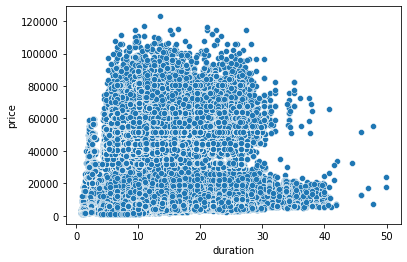

In [50]:
sns.scatterplot(data=df, x='duration', y='price')

<AxesSubplot: xlabel='days_left', ylabel='price'>

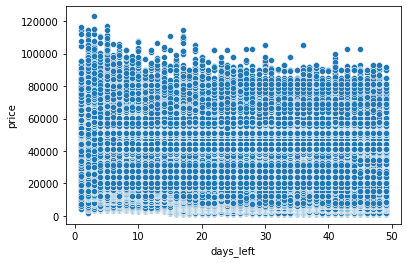

In [51]:
sns.scatterplot(data=df, x='days_left', y='price')

#### Correlations ####

<AxesSubplot: >

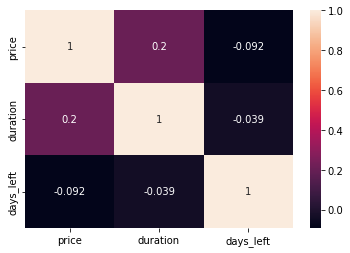

In [52]:
sns.heatmap(data=df[['price','duration','days_left']].corr(), annot=True)

In [53]:
df.corr()['price'].sort_values()

class_Economy                  -0.937860
airline_Indigo                 -0.280882
airline_GO_FIRST               -0.194179
stops_zero                     -0.187277
airline_SpiceJet               -0.114019
arrival_time_Late_Night        -0.093602
days_left                      -0.091949
stops_two_or_more              -0.064248
arrival_time_Early_Morning     -0.060449
destination_city_Delhi         -0.052527
source_city_Delhi              -0.043282
departure_time_Late_Night      -0.033768
source_city_Hyderabad          -0.012828
departure_time_Early_Morning   -0.012232
destination_city_Hyderabad     -0.008292
departure_time_Evening          0.007946
destination_city_Mumbai         0.010533
source_city_Mumbai              0.013206
source_city_Kolkata             0.016127
departure_time_Morning          0.018199
destination_city_Chennai        0.018473
source_city_Chennai             0.018742
arrival_time_Night              0.020344
destination_city_Kolkata        0.020956
arrival_time_Mor

### PREPARING THE DATA FOR TRAINING

In [54]:
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### MODEL TRAINING

#### Using grid search to find best hyperparameters for Lasso regularization. ####

In [55]:
from sklearn.linear_model import Lasso
model = Lasso(max_iter=10000)
params = {'alpha':[0.1,1,5,10,20]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,params)
grid.fit(X_train, y_train)
grid.best_estimator_

Lasso(alpha=0.1, max_iter=10000)

### PERFORMANCE EVALUATION

In [56]:
y_pred = grid.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9113944720345961